# Q1
## Open, read and make dictionary with k=inoviceNo and v=StockCode
## Create the desired text file

In [13]:
%matplotlib notebook

In [1]:
import openpyxl
from pathlib import Path

In [2]:
data_folder=Path("C:/Users/msi/Desktop/proje/proje/dataset/")
file_to_open= data_folder/ "Online_Shopping.xlsx"
my_data=openpyxl.load_workbook(file_to_open)
my_sheet=my_data.active

In [3]:
# this part of code creates a dic of invoiceNo and stockCodes.
all_transactions={}
for num,row in enumerate(my_sheet.iter_rows()):
    if num==0:
        continue
    else:
        temp=my_sheet.cell(row=num+1,column=1).value
        # pre-processing the data by filtering on quantity and description
        test_cell=my_sheet.cell(row=num+1,column=3).value
        quantity=my_sheet.cell(row=num+1,column=4).value
        price=my_sheet.cell(row=num+1,column=6).value
        if price!=0 and test_cell!=None and quantity>0:
            if temp not in all_transactions.keys():
                all_transactions[temp]=[str(my_sheet.cell(row=num+1,column=2).value)]
            else:
                all_transactions[temp].append(str(my_sheet.cell(row=num+1,column=2).value))

print(len(all_transactions))

19962


In [4]:
# this scripts creates a text file in the following foramt:
# InvoiceNo: items(displayed as StockCode)
f = open("All_transactions.txt","w")
for key,value in all_transactions.items():
    text=str(key)+": "+ str(value)+"\n"
    f.write(text)
f.close()

# Q2
## make a dictionary of items and their quantities and finally plot the bar chart

In [5]:
# this part of code creates a dic based of items and their quantities.
all_items={}
for num,row in enumerate(my_sheet.iter_rows()):
    if num==0:
        continue
    else:
        temp=my_sheet.cell(row=num+1,column=2).value
        quantity=my_sheet.cell(row=num+1,column=4).value
        test_cell=my_sheet.cell(row=num+1,column=3).value
        price=my_sheet.cell(row=num+1,column=6).value
        if price!=0 and test_cell!=None:
            if temp not in all_items.keys():
                all_items[temp]=quantity
            else:
                all_items[temp]+=quantity

<IPython.core.display.Javascript object>


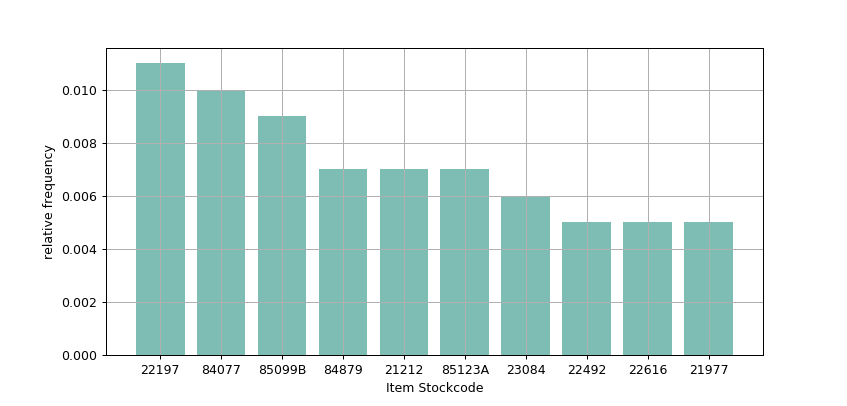

In [14]:
# plot the bar chart with scaling
all_items={str(key):value for key,value in all_items.items()}
all_items={k: v for k, v in sorted(all_items.items(), reverse=True, key=lambda item: item[1])}
total=0
for number in all_items.values():
    total+=number
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20/2.54, 10/2.54]
my_k=[item for i,item in enumerate(all_items.keys()) if i<10]
my_v=[round(item/total,3) for i,item in enumerate(all_items.values()) if i<10]
plt.bar(my_k,my_v,color='#7ebdb4')
plt.ylabel('relative frequency')
plt.xlabel('Item Stockcode')
plt.grid()
plt.show()

# Q3
## Apriori algorithm, a simple test and
## plot the results as x_axis=min_sup and y_axis=time

In [15]:
import itertools 
#finding subsets
def findsubsets(s, n): 
    return list(itertools.combinations(s, n)) 
  
def ap(all_transactions, min_sup):
    temp_dic={}
    
    #for the 1st time, let's see quantity of items, which is the quantity of 1-itemsets
    
    for key,value in all_transactions.items():
        for item in set(value):
            if item not in temp_dic.keys():
                temp_dic[item]=1
            else:
                temp_dic[item]+=1
    frequent_items={}
    min_support_count = min_sup * len(all_transactions)
    
    #filter the results via the min_support_count
    my_dic={k:v for k,v in temp_dic.items() if v>=min_support_count}
    #add items to frqunet ones
    
    for key,value in my_dic.items():
        frequent_items[key]=value
    
    #let's start from 2-itemsets
    
    flag=True
    k=1
    while flag :
        k+=1
        k_itemset=findsubsets(my_dic.keys(),2)
        # tset =ok!
        if k!=2:
            myl=[]
            for item in k_itemset:
                a=()
                for sub_item in item:
                    a+=sub_item
                if len(set(a))==k and tuple(set(sorted(a))) not in myl:
                    myl.append(tuple(set(sorted(a))))
            k_itemset=myl
        #test =ok!
        if len(k_itemset)==0:
            break
#       print(k_itemset)
        #create n-itemset dic
        temp_dic={k:0 for k in k_itemset}
        #check the quantity of n-itemset in all_transactions
        for things in all_transactions.values():
            for item in k_itemset:
                number=0
                for inside_item in item:
                    if inside_item in things:
                        number+=1
                if number==len(item):
                    temp_dic[item]+=1
        #filter the result
        my_dic={k:v for k,v in temp_dic.items() if v>=min_support_count}
        for key,value in my_dic.items():
            frequent_items[key]=value
#     print('The frequent items:\n')
#     for key,value in frequent_items.items():
#         print(key)
    return frequent_items

In [17]:
#performing apriori on dataset
import time
start_time=time.time()
result=ap(all_transactions,0.04)
end_time=time.time()
run_time=end_time-start_time
print ("run time:",run_time)
print("length of dic:", len(result))
print("result as a dictionary in the format of StockCode:support_count\n",result)

run time: 55.56455850601196
length of dic: 72
result as a dictionary in the format of StockCode:support_count
 {'85123A': 2198, '84879': 1455, '22960': 1132, 'POST': 1126, '21731': 849, '22726': 980, '22727': 1051, '22629': 900, '22086': 1160, '82494L': 910, '82482': 1100, '85099C': 933, '20725': 1565, '84991': 828, '21929': 865, '21212': 1320, '21977': 869, '21931': 1184, '22386': 1218, '22961': 1162, '22139': 962, '22411': 1175, '21175': 809, '22469': 1201, '22470': 925, '22457': 1249, '85099B': 2089, '21080': 986, '22197': 1392, '22910': 820, '21232': 831, '22112': 858, '22384': 1090, '20726': 1017, '22382': 1157, '20728': 1150, '20727': 1273, '22383': 1284, '20914': 880, '22178': 1037, '85099F': 812, '21034': 871, '22077': 955, '22630': 850, '21790': 926, '22423': 1988, '22699': 1065, '22697': 1013, '20712': 863, '22666': 1111, '22355': 882, '21928': 806, '84946': 905, '20719': 833, '20724': 1032, '21181': 845, '47566': 1685, '22720': 1385, '22722': 834, '22138': 934, '22993': 1073

<IPython.core.display.Javascript object>


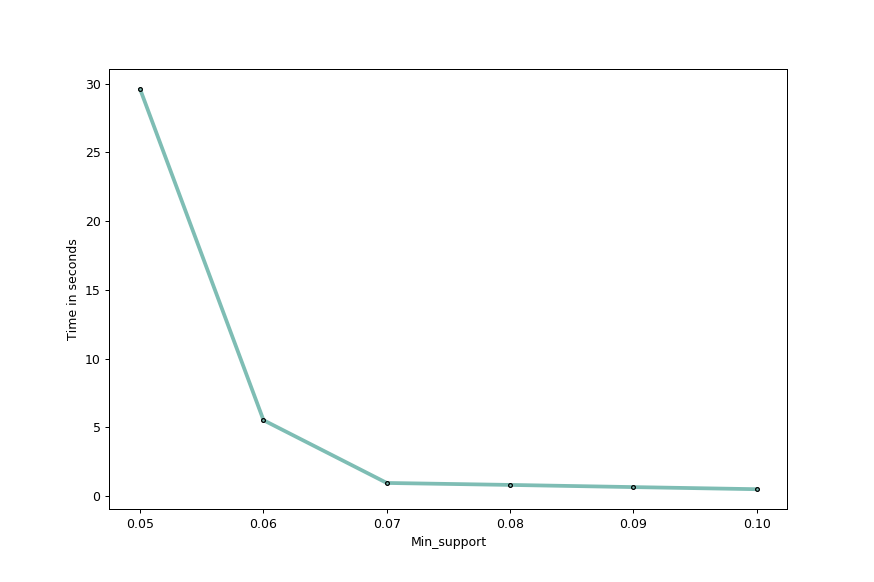

In [18]:
# time and plot the results with verious min_support
import time
time_dic={}
my_support=0.04
while True:
    my_support+=0.01
    my_support=round(my_support,2)
    if my_support>0.1 :
        break
    start_time=time.time()
    #if min_supprot was so high that no results were returned,then break the loop
    if len(ap(all_transactions,my_support))==0:
        break
    end_time=time.time()
    run_time=end_time-start_time
    time_dic[my_support]=round(run_time,3)
# string_keys=[str(key) for key in time_dic.keys()]
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
plt.plot(list(time_dic.keys()),list(time_dic.values()),color='#7ebdb4',marker='.',mec='black', lw=3)
plt.ylabel('Time in seconds')
plt.xlabel('Min_support')
# plt.grid()
plt.show()

# Q4
## Eclat, a simple test and
## eclat vs apriori plot

In [19]:
import itertools 
#finding subsets
def findsubsets(s, n): 
    return list(itertools.combinations(s, n)) 
def eclat(all_transactions,min_sup):
    temp_dic={}
    #let's find out transaction per item
    for key,value in all_transactions.items():
        for item in value:
            if item not in temp_dic.keys():
                temp_dic[item]=set([key])
            else:
                temp_dic[item].add(key)
                
    frequent_items={}
    min_support_count = min_sup * len(all_transactions)
    #filter the results via the min_support_count
    my_dic={k:v for k,v in temp_dic.items() if len(v)>=min_support_count}
    #add items to frqunet ones
    for key,value in my_dic.items():
        frequent_items[key]=value
    
    #let's start from 2-itemsets
    
    k=1
    while True :
        k+=1
        k_itemset=findsubsets(my_dic.keys(),2)
        if len(k_itemset)==0:
            break
            
        #test 2
        temp_dic={}
        if k>2:
            for item in k_itemset:
                for i,sub_item in enumerate(item):
                    if i==0:
                        templ=[value for value in sub_item]
                        tempv=my_dic[sub_item]
                    else:
                        similarity=[value for value in templ if value in sub_item]
                        if len(similarity)== len(sub_item)-1:
                            the_key=tuple(set(sorted(templ+list(sub_item))))    
                            the_value=[x for x in tempv if x in my_dic[sub_item]]
                            temp_dic[the_key]=the_value
        #test 2 ok!
        
        #create 2-itemset dic
        if k==2:
            temp_dic={k:[] for k in k_itemset}
            
            #check the intersections
            for item in temp_dic.keys():
                temp_dic[item]=[x for x in my_dic[item[0]] if x in my_dic[item[1]]]
        my_dic={k:v for k,v in temp_dic.items() if len(v)>=min_support_count}
        #add items to frqunet ones
        for key,value in my_dic.items():
            frequent_items[key]=value
#     print('The frequent items:\n')
#     for key,value in frequent_items.items():
#         print(key)
    return frequent_items

In [20]:
#performing eclat on dataset
import time
start_time=time.time()
eclat_result_0=eclat(all_transactions,0.04)
end_time=time.time()
run_time=end_time-start_time
print("runtime: ",run_time)
print("length of dic:",len(eclat_result_0))

# print("result as a dictionary in the format of StockCode:support_count\n", eclat_result_0)

runtime:  1.350813388824463
length of dic: 72


In [8]:
# import pickle
# with open('eclet_result_0.pickle', 'wb') as handle:
#     pickle.dump(eclat_result_0, handle, protocol=pickle.HIGHEST_PROTOCOL)

<IPython.core.display.Javascript object>


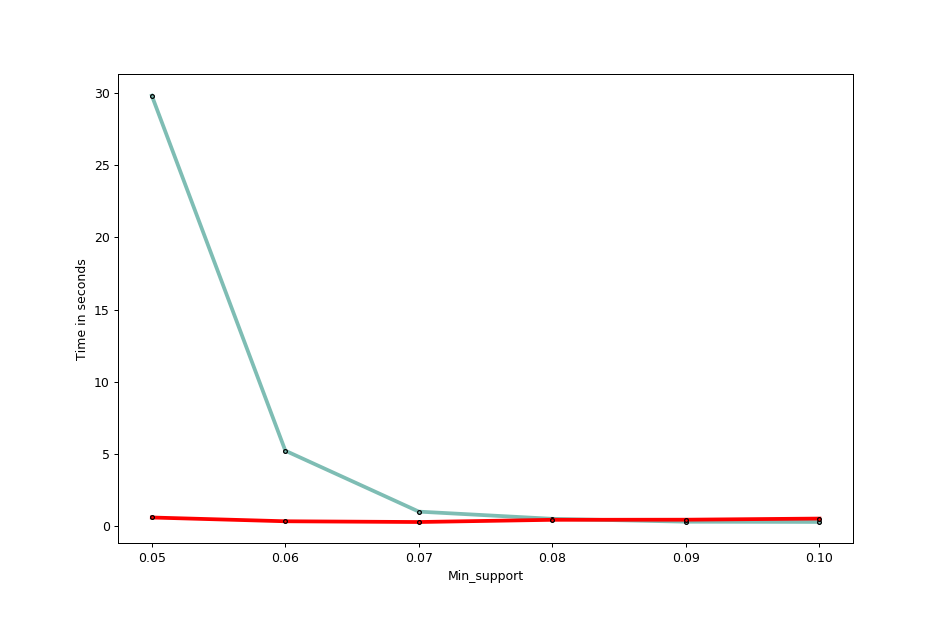

In [21]:
# time and plot the results with verious min_support
import time
time_dic={}
my_support=0.04
while True:
    my_support+=0.01
    my_support=round(my_support,2)
    if my_support>0.1 :
        break
    start_time=time.time()
    #if min_supprot was so high that no results were returned,then break the loop
    if len(ap(all_transactions,my_support))==0:
        break
    end_time=time.time()
    run_time=end_time-start_time
    time_dic[my_support]=round(run_time,3)
# %matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20/2.54, 16/2.54]
plt.plot(list(time_dic.keys()),list(time_dic.values()),color='#7ebdb4',marker='.',mec='black', lw=3)
plt.ylabel('Time in seconds')
plt.xlabel('Min_support')
# plt.grid()
# plt.show()
##################################
time_dic={}
my_support=0.04
while True:
    my_support+=0.01
    my_support=round(my_support,2)
    if my_support>0.1 :
        break
    start_time=time.time()
    #if min_supprot was so high that no results were returned,then break the loop
    if len(eclat(all_transactions,my_support))==0:
        break
    end_time=time.time()
    run_time=end_time-start_time
    time_dic[my_support]=round(run_time,3)
plt.plot(list(time_dic.keys()),list(time_dic.values()),color='red',marker='.',mec='black', lw=3)
plt.show()

# Q5
## extracting rules both for apriori and eclat
## Top_k_rules for creating the desired number of rules with the minimum conf as 0.7 and maximum min_sup of 0.05
## testing top_k_rules on eclat and apriori

In [22]:
def rules_for_ap (ap_frequent_items,min_conf):
    dic_rules={}
    temp_dic={}
    for key,value in ap_frequent_items.items():
        if type(key)==str:
            temp_dic[frozenset({key})]=value
        else:
            temp_dic[frozenset(key)]=value
    ap_frequent_items=temp_dic
#     print(ap_frequent_items)
    for key,value in ap_frequent_items.items():
        for before_key,before_value in ap_frequent_items.items():
            if before_key.issubset(key) and len(key)!=1 and key!=before_key:
                conf=ap_frequent_items[key]/ap_frequent_items[before_key]
                if conf>=min_conf:
                    dic_rules["{this} --> {that}".format(this=before_key,that=key.difference(before_key))]= [conf,conf/(ap_frequent_items[key.difference(before_key)]/len(all_transactions))]
    return dic_rules

In [23]:
def rules_for_eclat (ap_frequent_items,min_conf):
    dic_rules={}
    temp_dic={}
    for key,value in ap_frequent_items.items():
        if type(key)==str:
            temp_dic[frozenset({key})]=len(value)
        else:
            temp_dic[frozenset(key)]=len(value)
    ap_frequent_items=temp_dic
#     print(ap_frequent_items)
    for key,value in ap_frequent_items.items():
        for before_key,before_value in ap_frequent_items.items():
            if before_key.issubset(key) and len(key)!=1 and key!=before_key:
                conf=ap_frequent_items[key]/ap_frequent_items[before_key]
                if conf>=min_conf:
                    dic_rules["{this} --> {that}".format(this=before_key,that=key.difference(before_key))]= [round(conf,2),round(conf/(ap_frequent_items[key.difference(before_key)]/len(all_transactions)),2)]
    return dic_rules

### Pay attention that decresing amount isn't the same for apriori and eclat
### Also if you want to use apriori change suggested_min_sup to at least 0.05

In [24]:
# this piece of code provides us with the requested number of rules with the minimum conf as 0.7 and maximum min_sup of 0.05
def top_k_rules(algorithm,frequent_items,floor_number,ceil_number):
    suggested_conf=0.7
    suggested_min_sup=0.006
    total_rules=0
    if algorithm=='ap':
        while total_rules<floor_number:
            # decrease min_sup to get more rules
            suggested_min_sup=round((suggested_min_sup - 0.01),3)
            apriori_results=ap(frequent_items,suggested_min_sup)
            total_rules_dic=rules_for_ap(apriori_results,suggested_conf)
            total_rules=len(total_rules_dic)
            print("sup={s} and conf={c} and number of rules={n}".format(s=suggested_min_sup,c=suggested_conf, n=total_rules))
        #increase conf to get less rules
        while total_rules>ceil_number:
            suggested_conf=round((suggested_conf + 0.05),2)
            total_rules_dic=rules_for_ap(apriori_results,suggested_conf)
            total_rules=len(total_rules_dic)
            print("sup={s} and conf={c}".format(s=suggested_min_sup,c=suggested_conf))
        return total_rules_dic
    elif algorithm=='eclat':
        while total_rules<floor_number:
            # decrease min_sup to get more rules
            suggested_min_sup=round((suggested_min_sup - 0.001),3)
            apriori_results=eclat(frequent_items,suggested_min_sup)
            total_rules_dic=rules_for_eclat(apriori_results,suggested_conf)
            total_rules=len(total_rules_dic)
            print("sup={s} and conf={c} and number of rules={n}".format(s=suggested_min_sup,c=suggested_conf, n=total_rules))
        #increase conf to get less rules
        while total_rules>ceil_number:
            suggested_conf=round((suggested_conf + 0.05),2)
            total_rules_dic=rules_for_eclat(apriori_results,suggested_conf)
            total_rules=len(total_rules_dic)
            print("sup={s} and conf={c}".format(s=suggested_min_sup,c=suggested_conf))
        return total_rules_dic
    else:
        print ('the name is incorrect')
        pass

### In below cell I have imported the eclat result for min_support=0.004 which is the lowest amount in a reasonable time and memory, that I could achive
### it made 56660 rules

In [25]:
import pickle
with open('eclet_result_004.pickle', 'rb') as handle:
    b = pickle.load(handle)
final_dic=rules_for_eclat(b,0.7)


In [26]:
print(len(final_dic))

56660


### Because generating more than 20k rules takes lots of time and i had to tweak my code so many times, result of the below cell was dumped to a pickle and the log is not available in cell

In [ ]:
top_dic=top_k_rules('eclat',second_trans,20000,30000)

In [28]:
import pickle
with open('top_dic.pickle', 'rb') as handle:
    top_dic = pickle.load(handle)
print (len(top_dic))

20879


# Q6
## Basket_generator, Suggestion system based on extracted rules in Q5

In [29]:
from itertools import chain, combinations
import random
def powerset(iterable):
#     "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(2,len(s)+1))

def basket_gen(length):
    basket=[]
    for i in range(length):
        rand_num = random.randint(0,len(all_items.keys()))
        basket.append(str(list(all_items.keys())[rand_num]))
    return basket
    
# suggest the rule with the highest lift which is also not available in the basket right now

def suggest(my_trans):
    my_powerset=[frozenset({item}) for item in my_trans]+[frozenset(item) for item in list(powerset(my_trans))]
#     my_powerset=set(my_powerset)
#     print(my_powerset)
    the_suggestions=[]
    for item in my_powerset:
        temp_dic={}
        for key,value in top_dic.items():
            if key.split('-->')[0].strip()==str(item):
                if key.split('-->')[1].strip() not in [str(x) for x in my_powerset if x!=item ]:
                    temp_dic[key]=value
        temp_dic={k: v for k, v in sorted(temp_dic.items(), reverse=True, key=lambda item: item[1][1]) if v[1]>1}
#         print(temp_dic)
        if len(temp_dic)>0:    
            first_item = next(iter(temp_dic.items()))
            the_suggestions.append(first_item)
    return the_suggestions

In [30]:
my_bakset=basket_gen(5)
print(my_bakset)
my_basket_2=['22918', '22916', '22921', '22917', '22940']
suggest(my_basket_2)

['21844', '23556', '84598', '85130D', '21163']


[("frozenset({'22918'}) --> frozenset({'22919', '22917', '22921', '22916'})",
  [0.71, 82.88]),
 ("frozenset({'22916'}) --> frozenset({'22920', '22917', '22921'})",
  [0.71, 82.74]),
 ("frozenset({'22921'}) --> frozenset({'22916', '22919', '22920', '22917', '22918'})",
  [0.75, 87.17]),
 ("frozenset({'22917'}) --> frozenset({'22919', '22918', '22921', '22916'})",
  [0.7, 81.24]),
 ("frozenset({'22918', '22921'}) --> frozenset({'22917', '22919', '22920', '22916'})",
  [0.81, 89.21]),
 ("frozenset({'22917', '22921'}) --> frozenset({'22919', '22920', '22918', '22916'})",
  [0.83, 93.68])]

# Creating a better suggestion system by considering quantity and price and most importnatly people behaviour

In [31]:
# creating two dictionaries
# one(all_money) to see how much money people have spent in each transaction
# second(average_buy_and_price) to see what's the quantity and price of items in total transactions
all_money={}
average_buy_and_price={}
for num,row in enumerate(my_sheet.iter_rows()):
    if num==0:
        continue
    else:
        temp=my_sheet.cell(row=num+1,column=1).value
        # pre-processing the data by filtering on quantity and description
        test_cell=my_sheet.cell(row=num+1,column=3).value
        quantity=my_sheet.cell(row=num+1,column=4).value
        price=my_sheet.cell(row=num+1,column=6).value
        code=str(my_sheet.cell(row=num+1,column=2).value)
        if price>0 and test_cell!=None and quantity>0:
            if code not in average_buy_and_price.keys():
                average_buy_and_price[code]=[price,quantity,1]
            else:
                average_buy_and_price[code][1]+=quantity
                average_buy_and_price[code][2]+=1
            if temp not in all_money.keys():
                all_money[temp]=(my_sheet.cell(row=num+1,column=4).value)*(my_sheet.cell(row=num+1,column=6).value)
            else:
                all_money[temp]+=(my_sheet.cell(row=num+1,column=4).value)*(my_sheet.cell(row=num+1,column=6).value)

In [32]:
average_buy_and_price={key:[value[0],round(value[1]/value[2],2)] for key,value in average_buy_and_price.items()}
mon_list=sorted(all_money.values())
print(len(mon_list))

19960


In [33]:
# I am making groups of transactions. each one wih the size of 100
i=0
chunk_list=[]
while i<19900:
    from_this_value= mon_list[i]
    i+=100
    to_that_value=mon_list[i]
    chunk_list.append([round(from_this_value,2),round(to_that_value,2)])

In [34]:
# my basket is in the following format --> item : [quantity,price]
test_basket={'22918':[2,0.65], '22916':[2,0.65], '22921':[2,1.66], '22917':[2,1.66], '22940':[2,8.47]}
def sugggest_2(my_basket):
    total_price=0
    for key,value in my_basket.items():
        total_price+=round(value[0]*value[1],2)
    for i,item in enumerate(chunk_list):
        if total_price>item[0] and total_price<item[1]:
            # now we now in what chunk of spending money we are
            my_chunk=i
    how_much_more_money=chunk_list[my_chunk+1][1]-total_price
    
    #sort func to find leaset gap between how much and total price of the suggested rule
    
    def sort_func(the_key):
        the_key=the_key[0]
        price_gap=0
        key_list=(the_key.split('-->')[1].strip()).split("frozenset")[1].replace("(",'').replace(")",'').replace("{",'').replace("}",'').replace("'",'').split(",")
        for item in key_list:
            price_gap+=average_buy_and_price[item.strip()][0] * average_buy_and_price[item.strip()][1]
        return price_gap-how_much_more_money
    
    ##################################
    my_powerset=[frozenset({item}) for item in my_basket.keys()]+[frozenset(item) for item in list(powerset(my_basket.keys()))]
    the_suggestions=[]
    for item in my_powerset:
        temp_dic={}
        for key,value in top_dic.items():
            if key.split('-->')[0].strip()==str(item):
                if key.split('-->')[1].strip() not in [str(x) for x in my_powerset if x!=item ]:
                    temp_dic[key]=value
        temp_dic={k: v for k, v in sorted(temp_dic.items(), reverse=True, key=lambda item: item[1][1]) if v[1]>1}
#         print(len(temp_dic))
#         print(len(sorted(temp_dic.keys(), key=sort_func)))
        temp_dic={k: v for k,v in sorted(temp_dic.items(), key=sort_func)}
        if len(temp_dic)>0:    
            first_item = next(iter(temp_dic.items()))
            the_suggestions.append(first_item)
    return the_suggestions
    

In [35]:
sugggest_2(test_basket)

[("frozenset({'22918'}) --> frozenset({'22919'})", [0.89, 74.08]),
 ("frozenset({'22916'}) --> frozenset({'22919'})", [0.87, 72.29]),
 ("frozenset({'22921'}) --> frozenset({'22919'})", [0.91, 75.61]),
 ("frozenset({'22917'}) --> frozenset({'22919'})", [0.88, 73.46]),
 ("frozenset({'22918', '22921'}) --> frozenset({'22919'})", [0.95, 78.86]),
 ("frozenset({'22917', '22921'}) --> frozenset({'22919'})", [0.94, 77.89])]